Import thư viện

In [1]:
import numpy as np 
from numpy import log,dot,exp,shape
import pandas as pd
import matplotlib.pyplot as plt # Các bạn có thể thử plot chart bằng plotly
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  

# 1: Implement hàm sigmoid

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 2: Implement lại Logistic Regression

In [3]:
def standardize(X_tr):
    # Normalize lại các giá trị để có thể tính toán một cách "mượt" hơn 
    # Sau này, khi xây dựng model, các bạn nên normalize lại dữ liệu trước khi train
    mean = np.mean(X_tr, axis=0)
    std = np.std(X_tr, axis=0)
    X_tr_standardized = (X_tr - mean) / std
    return X_tr_standardized


def f1_score(y,y_hat):
    true_positive = np.sum((y == 1) & (y_hat == 1))
    false_positive = np.sum((y == 0) & (y_hat == 1))
    false_negative = np.sum((y == 1) & (y_hat == 0))
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)   
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score

In [4]:
class LogisticRegression:
    def __init__(self,learning_rate=0.01, num_epochs=100, verbose=True):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.verbose = verbose
        self.loss_hist = []

    def _initialize(self,X):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

    def fit(self,X,y):
        self._initialize(X)
        for epoch in range(self.num_epochs):
            # Compute predicted probabilities
            y_hat = sigmoid(np.dot(X, self.weights) + self.bias)
            # Compute loss
            loss = self._compute_loss(y, y_hat)
            self.loss_hist.append(loss)
            # Compute gradient
            gradient = self._compute_gradient(X, y, y_hat)
            # Update weights and bias
            self.weights -= self.learning_rate * gradient['weights']
            self.bias -= self.learning_rate * gradient['bias']
            if self.verbose:
                print(f'Epoch {epoch + 1}, Loss: {loss}')
    
    def _compute_loss(self, y, y_hat):
        m = y.shape[0]
        loss = -(1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        return loss

    def _compute_gradient(self, X, y, y_hat):
        m = y.shape[0]
        gradient_weights = (1/m) * np.dot(X.T, (y_hat - y))
        gradient_bias = (1/m) * np.sum(y_hat - y)
        gradient = {'weights': gradient_weights, 'bias': gradient_bias}
        return gradient
    @property
    def loss_hist(self):
        return self.loss_hist
    def loss_hist(self, value):
        self._loss_hist = value
    def predict(self,X):
        y_hat = sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred = np.round(y_hat)
        return y_pred



# 3a: Tạo dữ liệu

In [5]:
from sklearn.datasets import make_classification

# Tạo dữ liệu với make_classification()
n_samples = 200
n_features = 2
n_classes = 2
n_informative = 1 # Số lượng đặc trưng mang thông tin
n_redundant = 0 # Số lượng đặc trưng dư thừa
n_repeated = 0 # Số lượng đặc trưng bị lặp lại
n_clusters_per_class = 1 # Số lượng clusters của mỗi lớp
random_state = 22 # Số ngẫu nhiên để đảm bảo tính nhất quán của dữ liệu

X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, 
                           n_redundant=n_redundant, n_repeated=n_repeated, n_classes=n_classes, 
                           n_clusters_per_class=n_clusters_per_class, random_state=random_state)

# X là ma trận đặc trưng với kích thước (n_samples, n_features)
# y là mảng nhãn với kích thước (n_samples,)



#3b: Visualize dữ liệu

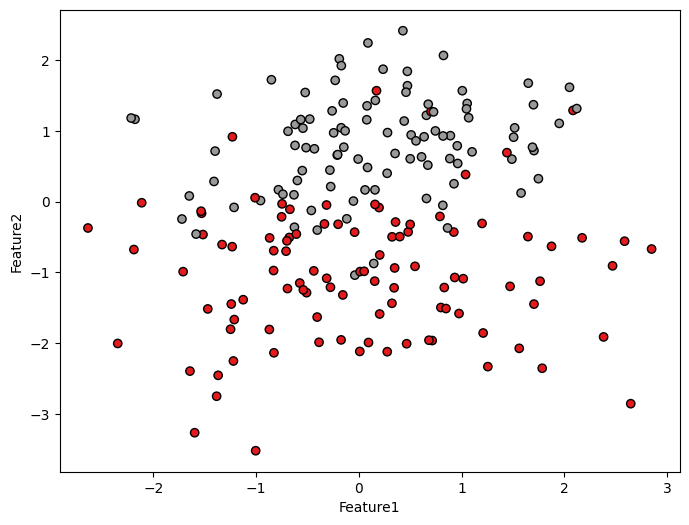

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', edgecolors='k')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# 3c: Chia dữ liệu thành train và test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
print("X_train", len(X_train))
print("X_test:", len(X_test))

X_train 140
X_test: 60


# 4: Fit dữ liệu với Logistic Regression

In [8]:
model = LogisticRegression(learning_rate=0.01, num_epochs=100, verbose=True)
model.fit(X,y)
y_pred = model.predict(X_test)
f1_score_train = f1_score(y_train, model.predict(X_train))
f1_score_test = f1_score(y_test, y_pred)
print("f1_score_train", f1_score_train)
print("f1_score_test", f1_score_test)

Epoch 1, Loss: 0.6931471805599452
Epoch 2, Loss: 0.6910329710423088
Epoch 3, Loss: 0.6889350346978781
Epoch 4, Loss: 0.6868532440172882
Epoch 5, Loss: 0.6847874718554731
Epoch 6, Loss: 0.6827375914518828
Epoch 7, Loss: 0.6807034764501353
Epoch 8, Loss: 0.6786850009170976
Epoch 9, Loss: 0.6766820393614043
Epoch 10, Loss: 0.6746944667514092
Epoch 11, Loss: 0.6727221585325768
Epoch 12, Loss: 0.6707649906443149
Epoch 13, Loss: 0.6688228395362518
Epoch 14, Loss: 0.6668955821839605
Epoch 15, Loss: 0.6649830961041373
Epoch 16, Loss: 0.6630852593692361
Epoch 17, Loss: 0.6612019506215658
Epoch 18, Loss: 0.6593330490868536
Epoch 19, Loss: 0.6574784345872833
Epoch 20, Loss: 0.6556379875540103
Epoch 21, Loss: 0.6538115890391656
Epoch 22, Loss: 0.6519991207273474
Epoch 23, Loss: 0.6502004649466158
Epoch 24, Loss: 0.6484155046789892
Epoch 25, Loss: 0.6466441235704588
Epoch 26, Loss: 0.6448862059405198
Epoch 27, Loss: 0.6431416367912329
Epoch 28, Loss: 0.6414103018158241
Epoch 29, Loss: 0.63969208740

In [9]:
model = LogisticRegression(learning_rate=0.01, num_epochs=100, verbose=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score_train = f1_score(y_train, model.predict(X_train))
f1_score_test = f1_score(y_test, y_pred)
print("f1_score_train", f1_score_train)
print("f1_score_test", f1_score_test)


Epoch 1, Loss: 0.6931471805599453
Epoch 2, Loss: 0.6909621983906951
Epoch 3, Loss: 0.6887948295092609
Epoch 4, Loss: 0.686644929507696
Epoch 5, Loss: 0.6845123544348634
Epoch 6, Loss: 0.6823969608202761
Epoch 7, Loss: 0.6802986056972076
Epoch 8, Loss: 0.6782171466250775
Epoch 9, Loss: 0.6761524417111157
Epoch 10, Loss: 0.6741043496313088
Epoch 11, Loss: 0.6720727296506364
Epoch 12, Loss: 0.6700574416425991
Epoch 13, Loss: 0.6680583461080477
Epoch 14, Loss: 0.6660753041933197
Epoch 15, Loss: 0.6641081777076882
Epoch 16, Loss: 0.6621568291401322
Epoch 17, Loss: 0.6602211216754392
Epoch 18, Loss: 0.6583009192096421
Epoch 19, Loss: 0.6563960863648046
Epoch 20, Loss: 0.6545064885031641
Epoch 21, Loss: 0.6526319917406359
Epoch 22, Loss: 0.6507724629596973
Epoch 23, Loss: 0.6489277698216523
Epoch 24, Loss: 0.6470977807782962
Epoch 25, Loss: 0.645282365082982
Epoch 26, Loss: 0.6434813928011057
Epoch 27, Loss: 0.6416947348200188
Epoch 28, Loss: 0.639922262858379
Epoch 29, Loss: 0.63816384947495

In [10]:
...

Ellipsis

# 4b: Tính f1-score

In [14]:
f1_score_train = f1_score(y_train, model.predict(X_train))
f1_score_test = f1_score(y_test, y_pred)
print("f1_score_train", f1_score_train)
print("f1_score_test", f1_score_test)

f1_score_train 0.8976377952755905
f1_score_test 0.8524590163934426


# 4c: Visualize loss

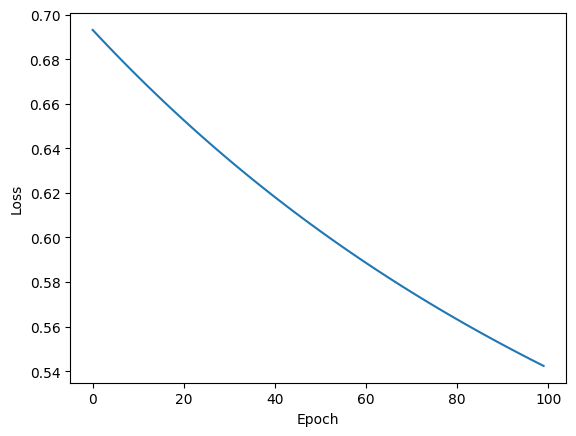

In [16]:
plt.plot(model.loss_hist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1, Loss: 0.6931471805599453
Epoch 2, Loss: 0.6746452300082083
Epoch 3, Loss: 0.6574043489250982
Epoch 4, Loss: 0.6413332938461225
Epoch 5, Loss: 0.6263448694950325
Epoch 6, Loss: 0.6123565577607779
Epoch 7, Loss: 0.5992908981776891
Epoch 8, Loss: 0.5870756629837002
Epoch 9, Loss: 0.5756438700469713
Epoch 10, Loss: 0.5649336737148862
Epoch 11, Loss: 0.5548881684792757
Epoch 12, Loss: 0.5454551344410062
Epoch 13, Loss: 0.5365867476932599
Epoch 14, Loss: 0.5282392733996824
Epoch 15, Loss: 0.5203727547502254
Epoch 16, Loss: 0.5129507071975152
Epoch 17, Loss: 0.5059398243733383
Epoch 18, Loss: 0.4993096997695815
Epoch 19, Loss: 0.4930325665318654
Epoch 20, Loss: 0.4870830564475342
Epoch 21, Loss: 0.48143797831272933
Epoch 22, Loss: 0.4760761152502023
Epoch 23, Loss: 0.4709780401497768
Epoch 24, Loss: 0.46612594816062775
Epoch 25, Loss: 0.46150350503495463
Epoch 26, Loss: 0.4570957100726738
Epoch 27, Loss: 0.45288877242132997
Epoch 28, Loss: 0.44886999952593104
Epoch 29, Loss: 0.445027

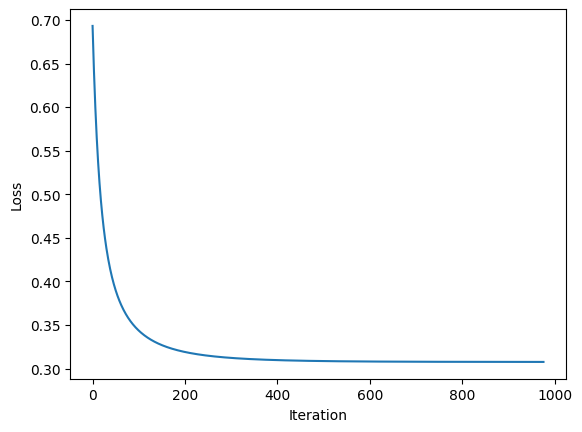

In [21]:
#@title # 5c Visualize loss với learning rate và iter khác nhau {"display-mode": "form"}
# Các bạn có thể thêm param "run": "auto" vào trong dictionary để cell tự động chạy khi bạn chỉnh param
lr = 0.471 #@param {type:"slider", min:0, max:1, step:0.0005}
iter = 660 #@param {type:"slider", min:0, max:1000, step:1}

# Phần trên dành cho các bạn sử dụng Google Colab, với các bạn sử dụng Jupyter , các bạn hãy xoá tất cả và chạy code trong ô này nhé!
# Phần trên dành cho các bạn sử dụng Google Colab, với các bạn sử dụng Jupyter , các bạn hãy xoá tất cả và chạy code trong ô này nhé!
model = LogisticRegression(learning_rate = lr, num_epochs= iter)

# Train mô hình
model.fit(X_train, y_train)

# Vẽ đồ thị loss được lưu ở loss_hist
plt.plot(model.loss_hist)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()